# FATAL VEHICLE CRASHES IN THE UNITED STATES
## Midterm project for Intro to Data Science course, Fall 2018
## John Hattas
## [DATA SOURCE](https://www-fars.nhtsa.dot.gov/Main/reportslinks.aspx)


---

<a id='Data'></a>
# Data
## [FARS Data](https://www-fars.nhtsa.dot.gov/Main/reportslinks.aspx)
The data is from the [Fatality Analysis Reporting System (FARS)](https://www.nhtsa.gov/research-data/fatality-analysis-reporting-system-fars)
> FARS is a nationwide census providing NHTSA, Congress and the American public yearly data regarding fatal injuries suffered in motor vehicle traffic crashes.

NHTSA is the National Highway Traffic Safety Administration, a branch of the United States Department of Transportation.<br>
From NHTSA's [website](https://www.nhtsa.gov/):
> Our mission is to save lives, prevent injuries, and reduce economic costs due to road traffic crashes, through education, research, safety standards, and enforcement.

[FARS Acronyms](https://www-fars.nhtsa.dot.gov/Help/acronyms.aspx)

## FARS Data Categories
### Trends

### Crashes
### Vehicles
### People
### States

---

# Setup

## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import plotly.plotly as py

from IPython.display import SVG, display

from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio

import os
sns.set() # sets seaborn default plot settings
sns.set_style('white')

## Choosing color palette

[seaborn color_palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)

There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks

[color brewer](http://colorbrewer2.org)

[xkcd colors](https://xkcd.com/color/rgb/)

In [2]:
def show_current_color_palette():
    current_palette = sns.color_palette()
    sns.palplot(current_palette)

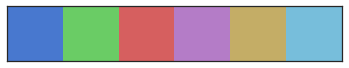

In [3]:
sns.set_palette("muted")
show_current_color_palette()

In [4]:
sns.color_palette().as_hex()

['#4878cf', '#6acc65', '#d65f5f', '#b47cc7', '#c4ad66', '#77bedb']

---

# Trends

## Fatal crashes per year

In [5]:
df = pd.read_table('data/trends/general/FatalCrashes.txt', header=0, index_col=0)
df.describe()

,Total
count,23.000000
mean,35310.173913
std,3365.055229
min,29867.000000
25%,31772.500000
50%,37140.000000
75%,37694.000000
max,39252.000000


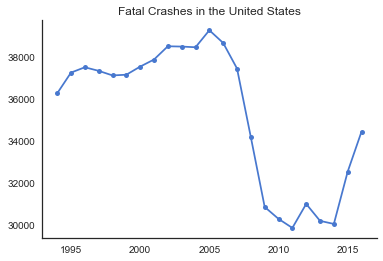

In [6]:
df.plot(marker='o',markersize=5)
sns.despine()
plt.xlabel('')
plt.legend('')
plt.title('Fatal Crashes in the United States')
plt.show()

Get a larger dataset for fatality rate from wikipedia

https://en.wikipedia.org/wiki/Motor_vehicle_fatality_rate_in_U.S._by_year

In [7]:
df = pd.read_csv('data/trends/general/wikipedia_fatality.csv', index_col=0)
df.describe().round()

,Deaths,VMT- Vehicle miles traveled (billions),Fatalities per 100 million VMT,Population,"Fatalities per 100,000 population"
count,118.0,96.0,96.0,117.0,117.0
mean,31529.0,1319.0,6.0,183773014.0,17.0
std,15877.0,1044.0,6.0,73441914.0,8.0
min,26.0,55.0,1.0,76094000.0,0.0
25%,23491.0,326.0,2.0,121767000.0,12.0
50%,35786.0,1039.0,5.0,174881904.0,19.0
75%,42804.0,2259.0,10.0,242288918.0,22.0
max,54589.0,3221.0,24.0,323121000.0,29.0


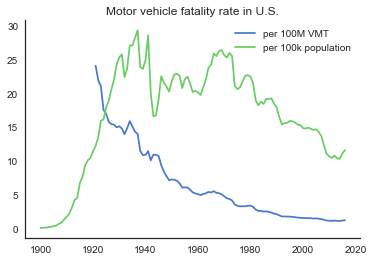

In [8]:
df.iloc[:,[2,4]].plot()
plt.xlabel('')
sns.despine()
plt.legend(('per 100M VMT', 'per 100k population'))
plt.title('Motor vehicle fatality rate in U.S.')
plt.savefig('images/1wik.pdf')
plt.show()

## General fatality trends

In [9]:
df = pd.read_table('data/trends/general/Fatalities.txt', header=0, index_col=0)
df.describe()

,Fatalities,Resident Population (Thousands),"Fatality Rate per 100,000 Population",Licensed Drivers (Thousands),"Fatality Rate per 100,000 Licensed Drivers",Registered Motor Vehicles (Thousands),"Fatality Rate per 100,000 Registered Vehicles",Vehicle Miles Traveled (Billions),Fatality Rate per 100 Million VMT,Unnamed: 10
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,0.0
mean,39100.913043,293762.913043,13.437826,199337.434783,19.803913,240101.173913,16.663043,2848.956522,1.387391,NaN
std,4113.536345,20082.290975,2.133723,13804.470020,3.154321,29163.246879,3.433132,224.603181,0.223347,NaN
min,32479.000000,260327.000000,10.280000,175403.000000,15.290000,192497.000000,11.920000,2358.000000,1.080000,NaN
25%,34684.000000,277426.500000,11.055000,188897.500000,16.215000,214856.500000,12.915000,2718.500000,1.150000,NaN
50%,41501.000000,295517.000000,14.630000,200549.000000,21.540000,245628.000000,17.710000,2957.000000,1.440000,NaN
75%,42130.500000,310505.500000,15.125000,210965.000000,22.195000,262201.500000,19.470000,2988.500000,1.540000,NaN
max,43510.000000,323128.000000,15.910000,221712.000000,23.680000,288034.000000,21.220000,3174.000000,1.730000,NaN


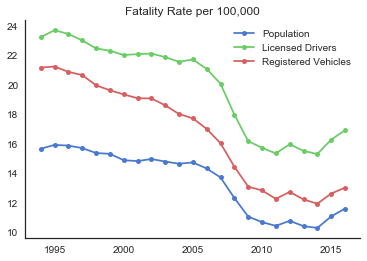

In [10]:
df.iloc[:,[2, 4, 6]].plot(marker='o',markersize=5)
plt.xlabel('')
plt.legend(('Population', 'Licensed Drivers', 'Registered Vehicles'))
plt.title('Fatality Rate per 100,000')
sns.despine()
plt.savefig('images/2rateper100k.pdf')
plt.show()

## Vehicle type

In [11]:
df = pd.read_table('data/trends/general/VehiclesInvolved.txt', header=[0,1,2],index_col=0)
df.describe()

,Vehicle Type,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,Unnamed: 10_level_0,Unnamed: 11_level_0,Unnamed: 12_level_0,Unnamed: 13_level_0
,Passenger Cars,Unnamed: 2_level_1,Unnamed: 3_level_1,Light Trucks,Unnamed: 5_level_1,Unnamed: 6_level_1,Large Trucks,Unnamed: 8_level_1,Unnamed: 9_level_1,Motorcycles,Unnamed: 11_level_1,Unnamed: 12_level_1,Unnamed: 13_level_1
Year,Number of Passenger Cars,Involvement Rate per 100 Million VMT,"Involvement Rate per 100,000 Registered Vehicles",Number of Light Trucks,Involvement Rate per 100 Million VMT1,"Involvement Rate per 100,000 Registered Vehicles1",Number of Large Trucks,Involvement Rate per 100 Million VMT2,"Involvement Rate per 100,000 Registered Vehicles2",Number of Motorcycles,Involvement Rate per 100 Million VMT3,"Involvement Rate per 100,000 Registered Vehicles3",Unnamed: 13_level_2
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,0.0
mean,24144.565217,1.589565,18.590000,19431.043478,1.877826,22.030435,4402.173913,1.940435,51.056087,3951.739130,28.146957,63.504783,NaN
std,4860.899148,0.287109,4.228305,2102.512922,0.385404,5.599509,543.383479,0.542741,14.317817,1197.205618,7.197862,6.593490,NaN
min,17508.000000,1.180000,13.160000,16353.000000,1.310000,13.900000,3211.000000,1.110000,29.260000,2160.000000,21.430000,55.890000,NaN
25%,19111.000000,1.335000,14.555000,17539.000000,1.475000,16.145000,3997.500000,1.425000,36.500000,2753.500000,23.355000,58.060000,NaN
50%,25169.000000,1.560000,18.600000,19179.000000,2.030000,24.230000,4633.000000,2.140000,57.860000,4603.000000,25.120000,60.980000,NaN
75%,27914.500000,1.775000,21.890000,21249.500000,2.200000,27.175000,4862.500000,2.430000,62.705000,4881.500000,31.155000,69.110000,NaN
max,30940.000000,2.090000,25.110000,22964.000000,2.350000,28.130000,4995.000000,2.730000,70.490000,5421.000000,44.790000,75.190000,NaN


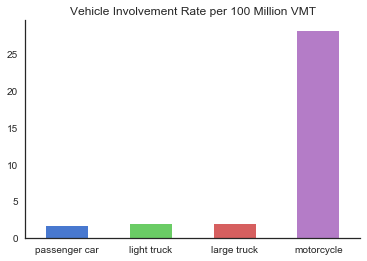

In [12]:
df.describe().iloc[:,[1,4,7,10]].loc['mean'].plot.bar(figsize=(6, 4)) # default figsize=(6,4)
plt.title('Vehicle Involvement Rate per 100 Million VMT')
plt.xlabel('')
plt.xticks([0,1,2,3], ['passenger car', 'light truck', 'large truck', 'motorcycle'])
plt.xticks(rotation=0)
sns.despine()
plt.savefig('images/3vehrate.pdf')
plt.show()

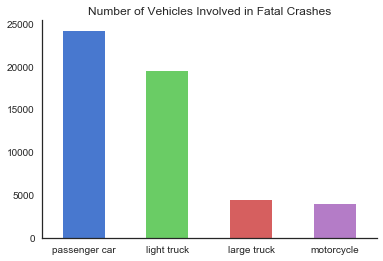

In [13]:
df.describe().iloc[:,[0, 3, 6, 9]].loc['mean'].plot.bar(figsize=(6, 4)) # default figsize=(6,4)
plt.title('Number of Vehicles Involved in Fatal Crashes')
plt.xlabel('')
plt.xticks([0,1,2,3], ['passenger car', 'light truck', 'large truck', 'motorcycle'], rotation=0)
sns.despine()
plt.savefig('images/4vehinvolved.pdf')
plt.show()

## Alcohol Trends

In [14]:
df = pd.read_csv('data/trends/alcohol/PersonsKilledByBAC.csv', header=[0,1], index_col=0)
df.describe().round()

,BAC = .00,Unnamed: 2_level_0,BAC = .01--.07,Unnamed: 4_level_0,BAC = .08+,Unnamed: 6_level_0,Total,Total Fatalities in Alcohol--Related Crashes,Unnamed: 9_level_0
Year,Number,Percent,Number,Percent,Number,Percent,Unnamed: 7_level_1,Number,Percent
count,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0
mean,24720.0,63.0,2168.0,5.0,12097.0,31.0,39101.0,14264.0,36.0
std,2492.0,1.0,265.0,1.0,1452.0,1.0,4114.0,1706.0,1.0
min,20848.0,61.0,1662.0,5.0,9865.0,28.0,32479.0,11527.0,33.0
25%,22341.0,62.0,1954.0,5.0,10416.0,30.0,34684.0,12386.0,36.0
50%,25768.0,63.0,2235.0,5.0,12757.0,31.0,41501.0,14973.0,36.0
75%,26716.0,64.0,2410.0,6.0,13357.0,32.0,42130.0,15738.0,38.0
max,27423.0,66.0,2494.0,6.0,13582.0,33.0,43510.0,15985.0,38.0


Stacked bar plot

[inspiration for this plot](https://www.perceptualedge.com/articles/visual_business_intelligence/displays_for_combining_time-series_and_part-to-whole.pdf)

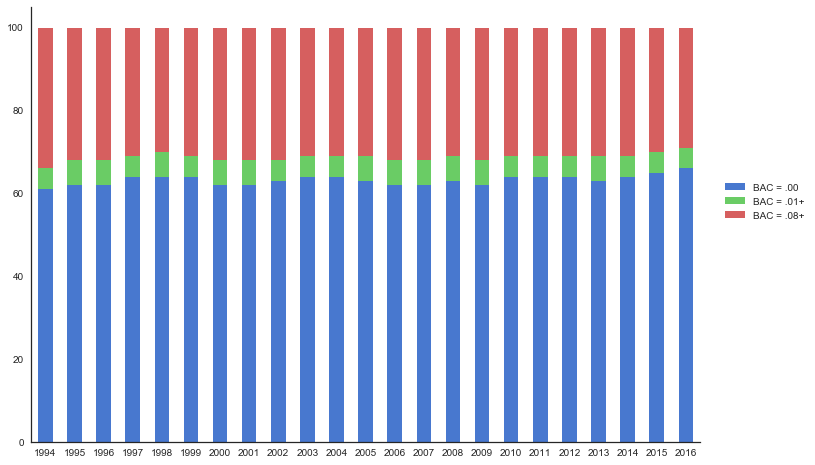

In [15]:
df.iloc[:,5] = 100 - df.iloc[:,1] - df.iloc[:,3] # make sure percents add up to 100 and not 99 (because rounding)
df.iloc[:,[1,3,5]].plot.bar(stacked=True, figsize=(12, 8))
plt.legend(('BAC = .00', 'BAC = .01+', 'BAC = .08+'),loc=(1.03,0.5))
sns.despine()
plt.xticks(rotation=0)
plt.savefig('images/5bactime.pdf')
plt.show()

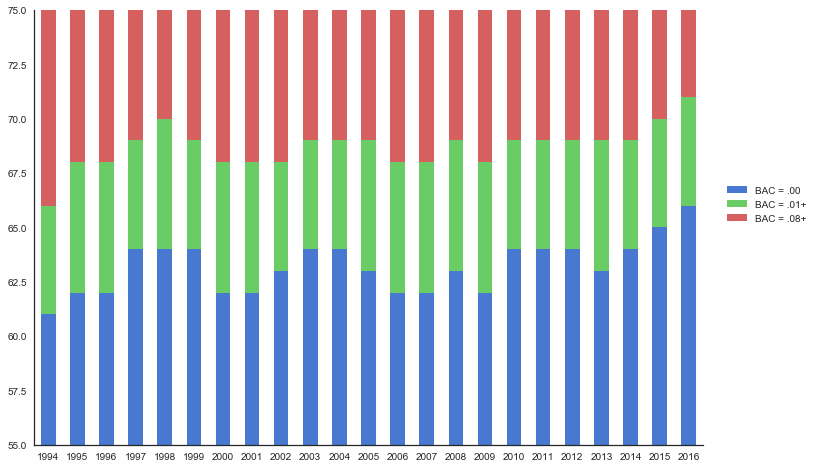

In [16]:
df.iloc[:,[1,3,5]].plot.bar(stacked=True, figsize=(12, 8))
plt.legend(('BAC = .00', 'BAC = .01+', 'BAC = .08+'),loc=(1.03,0.5))
sns.despine()
plt.xticks(rotation=0)
plt.ylim((55,75))
plt.savefig('images/6baczoom.pdf')
plt.show()

## Alcohol trends by sex

In [17]:
df_sex = pd.read_csv('data/trends/alcohol/DriversByBACSex.csv', header=[0,1], index_col=0)
df_sex.head()

Male,Female,,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0
Year,Total,BAC=.01+(Percent),BAC=.08+(Percent),Total,BAC=.01+(Percent),BAC=.08+(Percent),Unnamed: 7_level_1
1994,40233,30,26,13567,17,14,NaN
1995,41235,30,25,14184,16,13,NaN
1996,41376,29,25,14850,16,13,NaN
1997,40954,28,24,14954,15,12,NaN
1998,40816,28,23,15089,15,12,NaN


In [18]:
df = df.join(df_sex)
df.head()

,BAC = .00,Unnamed: 2_level_0,BAC = .01--.07,Unnamed: 4_level_0,BAC = .08+,Unnamed: 6_level_0,Total,Total Fatalities in Alcohol--Related Crashes,Unnamed: 9_level_0,Female,,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0
Year,Number,Percent,Number,Percent,Number,Percent,Unnamed: 7_level_1,Number,Percent,Total,BAC=.01+(Percent),BAC=.08+(Percent),Total,BAC=.01+(Percent),BAC=.08+(Percent),Unnamed: 7_level_1
1994,24948,61,2236,5,13390,34,40716,15626,38,40233,30,26,13567,17,14,NaN
1995,25768,62,2416,6,13478,32,41817,15893,38,41235,30,25,14184,16,13,NaN
1996,26052,62,2415,6,13451,32,42065,15866,38,41376,29,25,14850,16,13,NaN
1997,26902,64,2216,5,12757,31,42013,14973,36,40954,28,24,14954,15,12,NaN
1998,26477,64,2353,6,12546,30,41501,14899,36,40816,28,23,15089,15,12,NaN


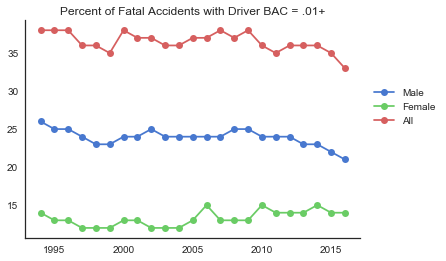

In [19]:
df.iloc[:,[11, 14, 8]].plot(marker='o')
plt.legend(('Male', 'Female', 'All'),loc=(1.03,0.5))
plt.title('Percent of Fatal Accidents with Driver BAC = .01+')
sns.despine()
plt.savefig('images/7bacsex.pdf')
plt.show()

## Seatbelt trends

In [20]:
df = pd.read_table('data/trends/restraints/Drivers.txt', header=1, index_col=0)
df.describe().round()

,Number,Percent,Number.1,Percent.1,Number.2,Percent.2,Number.3,Percent.3
count,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0
mean,25626.0,60.0,13955.0,32.0,3764.0,9.0,43345.0,100.0
std,2291.0,6.0,3860.0,5.0,776.0,1.0,5825.0,0.0
min,22183.0,49.0,8636.0,24.0,2603.0,8.0,34107.0,100.0
25%,23269.0,55.0,9628.0,27.0,2957.0,8.0,37336.0,100.0
50%,25498.0,61.0,14984.0,31.0,3743.0,8.0,46469.0,100.0
75%,27604.0,65.0,17298.0,36.0,4475.0,9.0,48151.0,100.0
max,29264.0,68.0,19427.0,41.0,4799.0,10.0,48798.0,100.0


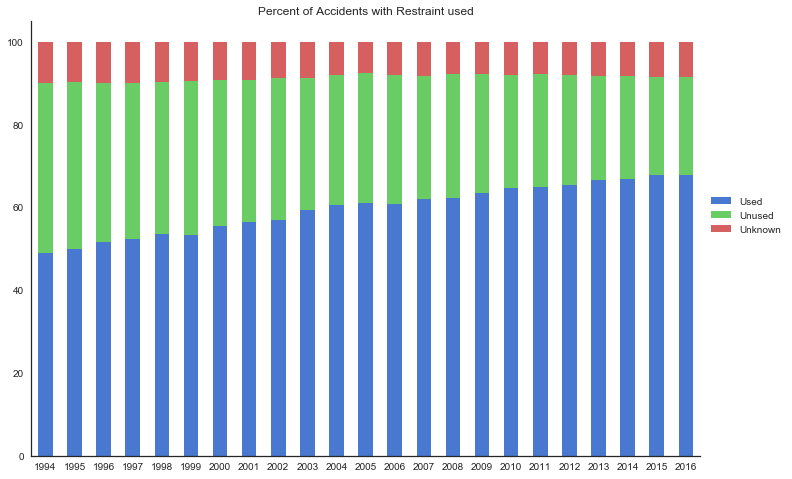

In [21]:
df.iloc[:,[1,3,5]].plot.bar(stacked=True, figsize=(12, 8))
plt.legend(('Used', 'Unused', 'Unknown'),loc=(1.01,0.5))
sns.despine()
plt.xlabel('')
plt.title('Percent of Accidents with Restraint used')
plt.xticks(rotation=0)
plt.savefig('images/8seatbelt.pdf')
plt.show()

# State analysis

In [22]:
df = pd.read_table('data/states/StateRates.txt', header=0, index_col=0)
exec(open('us_state_abbrev.py').read())
df['Code'] = df.index.to_series().map(us_state_abbrev)
df.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,"Difference, 1994 -- 2016",Unnamed: 49,Code
State,,,,,,,,,,,,,,,,,,,,,
Alabama,1083,1114,1146,1192,1071,1138,996,991,1038,1004,...,1.34,1.38,1.33,1.31,1.25,1.26,1.50,-32,NaN,AL
Alaska,85,87,81,77,70,79,106,89,89,98,...,1.17,1.57,1.23,1.05,1.50,1.29,1.60,-22,NaN,AK
Arizona,904,1035,994,951,980,1024,1036,1051,1132,1118,...,1.27,1.39,1.37,1.40,1.23,1.38,1.46,-37,NaN,AZ
Arkansas,609,631,615,660,625,604,652,611,640,640,...,1.70,1.67,1.67,1.49,1.38,1.58,1.52,-38,NaN,AR
California,4232,4192,3989,3688,3494,3559,3753,3956,4088,4224,...,0.84,0.88,0.91,0.94,0.93,1.01,1.07,-31,NaN,CA


In [23]:
map_data = [dict(
    type = 'choropleth',
    colorscale = 'Reds',
    locations = df['Code'],
    text = df.index,
    z = df.iloc[:,46],
    locationmode = 'USA-states',
    marker = dict(line = dict(color='#ffffff', width=1.5)),
    colorbar = dict(thickness=20,len=0.8,x=0.9,outlinewidth=0)
    )]
layout = dict(title='Fatality Rate per 100 Million Vehicle Miles Traveled',
              geo=dict(scope='usa'),
              font=dict(family="'Arial'",
              color='#2A2A2A'))
fig = dict(data=map_data, layout=layout)

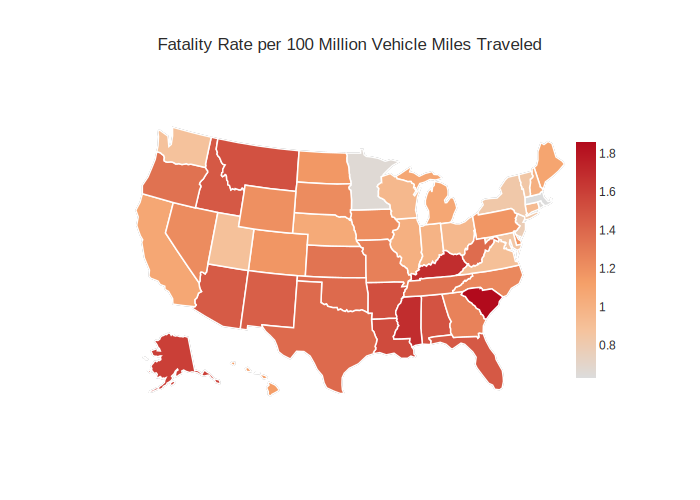

In [24]:
file_name = 'images/9staterate.svg'
pio.write_image(fig, file_name)
display(SVG(file_name))

In [25]:
df = pd.read_csv('data/states/statebac.csv', header=[0,1,2], index_col=0)
df['Code'] = df.index.to_series().map(us_state_abbrev)
df.head()

,Highest Blood Alcohol Concentration in Crash,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,Unnamed: 10_level_0,Code
,BAC = 0.00,Unnamed: 2_level_1,BAC = .01--.07,Unnamed: 4_level_1,BAC = .08+,Unnamed: 6_level_1,BAC=.01+,Unnamed: 8_level_1,Total Killed,Unnamed: 10_level_1,
State,Number,Percent,Number,Percent,Number,Percent,Number,Percent,Number,Percent,
Alabama,717,69,42,4,279,27,321,31,1038,100,AL
Alaska,46,55,7,8,30,36,37,44,84,100,AK
Arizona,659,68,57,6,232,24,289,30,962,100,AZ
Arkansas,394,72,34,6,117,21,150,28,545,100,AR
California,2368,65,188,5,1059,29,1247,34,3623,100,CA


In [26]:
map_data = [dict(
    type = 'choropleth',
    colorscale = 'Reds',
    locations = df['Code'],
    text = df.index,
    z = df.iloc[:,7],
    locationmode = 'USA-states',
    marker = dict(line = dict(color='#ffffff', width=1.5)),
    colorbar = dict(thickness=20,len=0.8,x=0.9,outlinewidth=0)
    )]
layout = dict(title='Percent of deaths in fatal crashes with driver BAC = .01+',
              geo=dict(scope='usa'),
              font=dict(family="'Arial'",
              color='#2A2A2A'))
fig = dict(data=map_data, layout=layout)

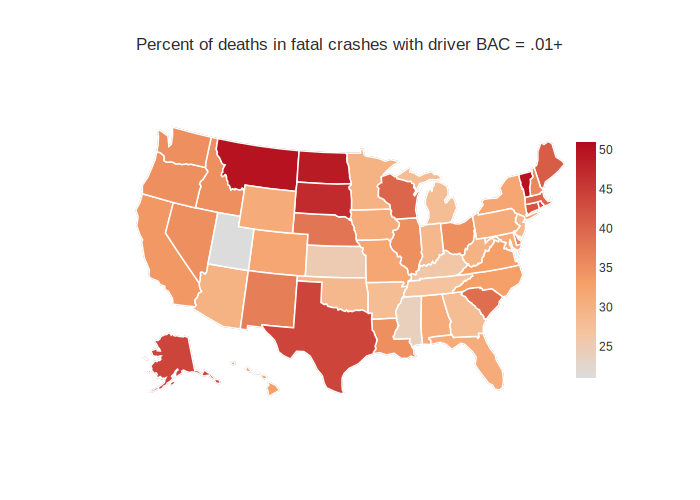

In [27]:
file_name = 'images/statebac.svg'
pio.write_image(fig, file_name)
display(SVG(file_name))

In [28]:
df = pd.read_csv('data/states/seatbelts.csv', header=0, index_col=0)
df.head()

,Base Fine,Seatbelt,Age Limit,First Base Fine,Code
State,,,,,
AL,25.0,Front,0.0,25.0,AL
AK,15.0,All,1.0,50.0,AK
AZ,10.0,Front,1.0,50.0,AZ
AR,25.0,Front,0.0,100.0,AR
CA,20.0,All,1.0,100.0,CA


In [29]:
pd.crosstab(df['Seatbelt'], df['Age Limit'])

Age Limit,0.0,1.0
Seatbelt,,
All,20,6
Front,7,17
None,0,1
